<a href="https://colab.research.google.com/github/gracekavemba/House_Pric_-Prediction/blob/main/House_Price_Prediction_Filled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset (fixed path)
df = pd.read_csv("Housing_data.csv")
print("Dataset shape:", df.shape)
df.info()
df.head()

Dataset shape: (500, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Size            500 non-null    int64
 1   Bedrooms        500 non-null    int64
 2   Location_Index  500 non-null    int64
 3   Age             500 non-null    int64
 4   Price           500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


,Size,Bedrooms,Location_Index,Age,Price
0,1860,2,2,22,577956
1,2294,1,3,7,754539
2,2130,4,3,14,705595
3,2095,2,5,15,708803
4,2638,4,5,7,908863


## Exploratory Data Analysis (EDA)

In [3]:
# Summary statistics
df.describe()

,Size,Bedrooms,Location_Index,Age,Price
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,2522.420000,2.424000,4.982000,25.214000,8.444065e+05
std,845.049606,1.148417,2.594444,13.839337,2.572609e+05
min,1001.000000,1.000000,1.000000,1.000000,3.074720e+05
25%,1815.000000,1.000000,3.000000,13.000000,6.283342e+05
50%,2509.500000,2.000000,5.000000,25.000000,8.509355e+05
75%,3253.500000,3.000000,7.000000,37.000000,1.052989e+06
max,3999.000000,4.000000,9.000000,49.000000,1.348298e+06


In [4]:
# Check missing values
df.isnull().sum()

,0
Size,0
Bedrooms,0
Location_Index,0
Age,0
Price,0


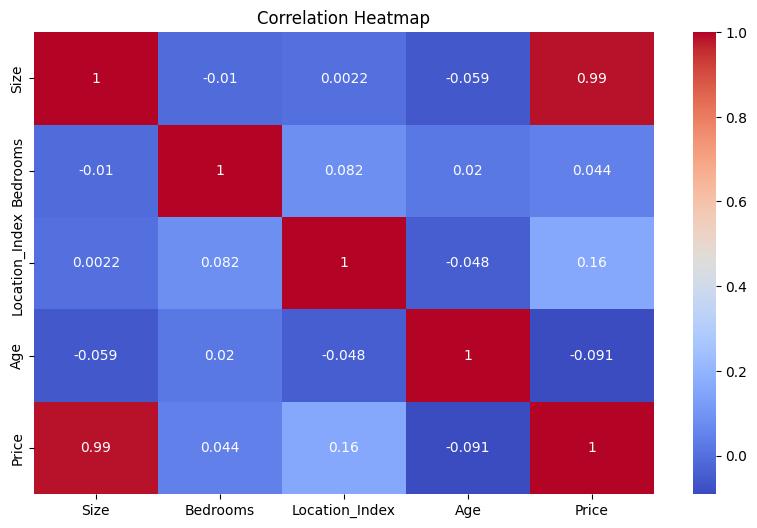

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

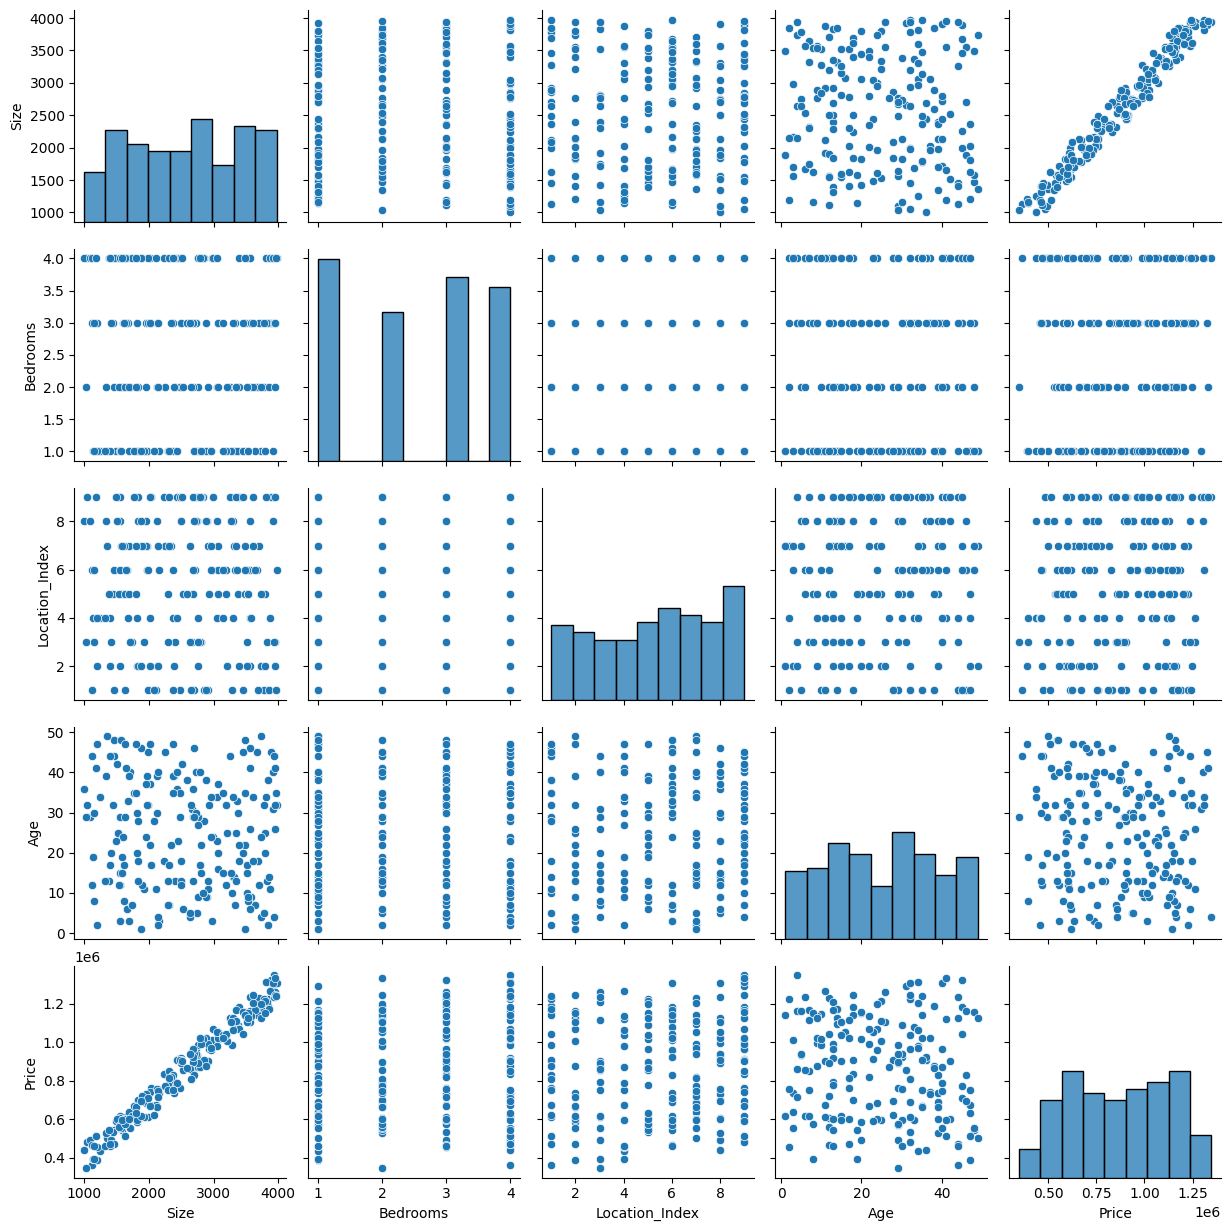

In [6]:
# Pairplot for a subset of variables (if dataset is large, sample it)
sns.pairplot(df.sample(min(200, len(df))))
plt.show()

## Data Preprocessing

In [9]:
# Handle missing values (simple strategy: drop rows with NA)
df_clean = df.dropna()

# Define features and target (assuming 'price' is the target column)
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessed feature shape:", X_scaled.shape)

Preprocessed feature shape: (500, 4)


## Train/Test Split

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (400, 4) Test shape: (100, 4)


## Model Training - Linear Regression

In [11]:
# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 147698616.32695642
R2 Score: 0.9976686364887377


## Visualization of Predictions vs Actual

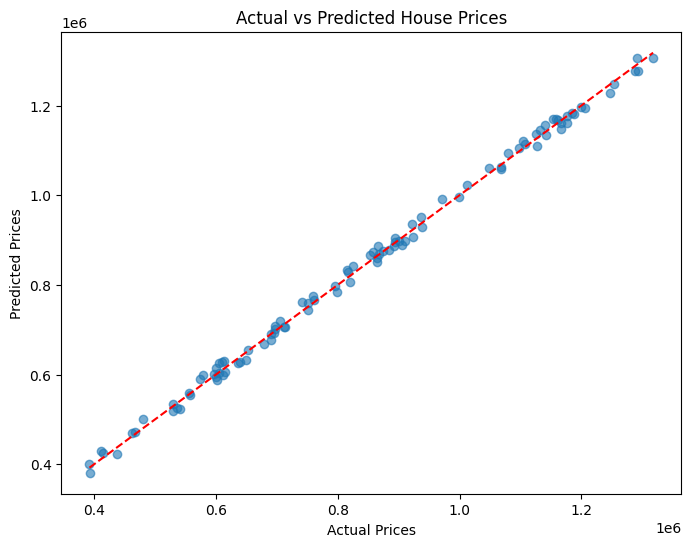

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Conclusion

We built a simple Linear Regression model for house price prediction. Further improvements can include trying more advanced models (Random Forest, XGBoost), feature engineering, and hyperparameter tuning.